In [1]:
%matplotlib inline

import warnings

import matplotlib as mpl
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings(action='once')

mpl.rcParams['figure.dpi'] = 150

MODEL_NAMES   = ['simple', 'all_conv', 'resnet20']
DATASET_NAMES = ['cifar10', 'cifar100_fine', 'cifar100_coarse', 'fashion_mnist']
CS_ORDER      = ['rgb', 'gray256', 'gray128', 'gray64', 'gray32', 'gray16', 'gray8']

In [3]:
def plot_acc_line(df):
    for mn in MODEL_NAMES:
        df['model'] = df['model'].str.replace('%s_' % (mn), '')
    for ds in DATASET_NAMES:
        df['model'] = df['model'].str.replace('%s_' % (ds), '')
    df['model'] = df['model'].str.replace('.h5', '')
    
    df['f_cs'] = df['color_space'] + df['n_colors'].map(str)
    df['f_cs'] = df['f_cs'].str.replace('rgb256', 'rgb')
    
    fig, ax = plt.subplots()
    
    for cs in CS_ORDER:
        aux = df[df['model'] == cs]
        accs = [aux[aux['f_cs'] == i]['test_acc'].values for i in CS_ORDER]
        accs = [i[0] for i in accs if len(i) > 0]
        if len(accs) == 6:
            accs = [accs[0]] + accs
            
        plt.plot(accs, label=cs)
        
    plt.legend(labels=CS_ORDER)
    ax.set_xticklabels([''] + CS_ORDER, rotation=-30)
#     ax.set_ylim((0.5, 1.0))
    ax.legend(loc='best')
    plt.show()

# CIFAR-10 results

In [4]:
cifar10_results = pd.read_csv('results_cifar10.csv')

## results for "original" NNs

In [5]:
cifar10_orig_results = cifar10_results[cifar10_results['clf'] == 'cnn']

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


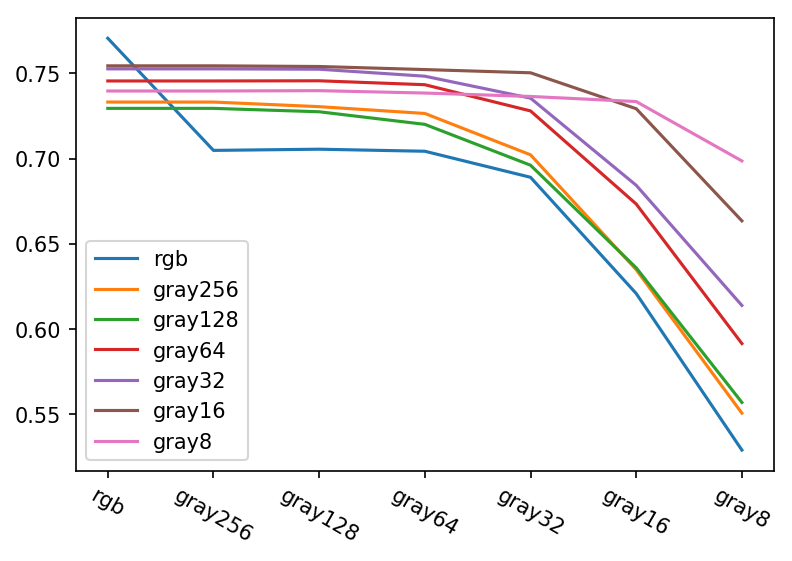

In [6]:
simple_orig = cifar10_orig_results[cifar10_orig_results['model'].str.contains('simple')]
plot_acc_line(simple_orig)

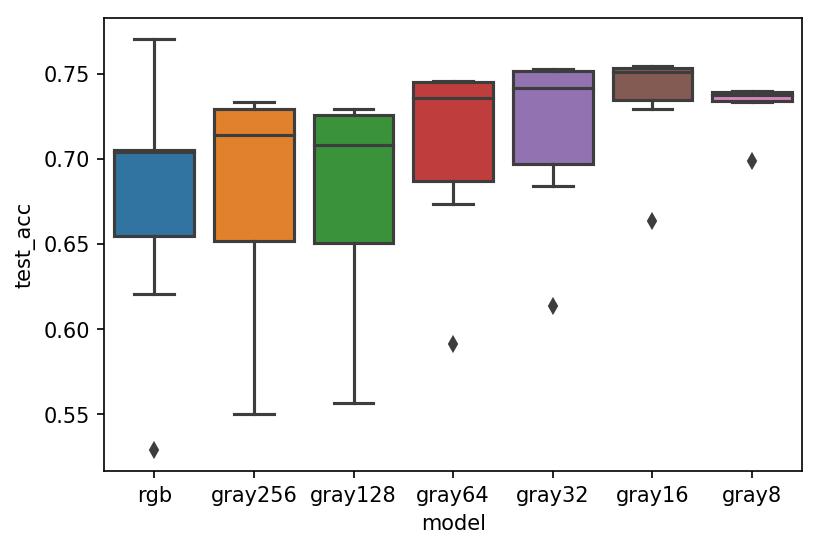

In [7]:
sb.boxplot(x='model', y='test_acc', data=simple_orig[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


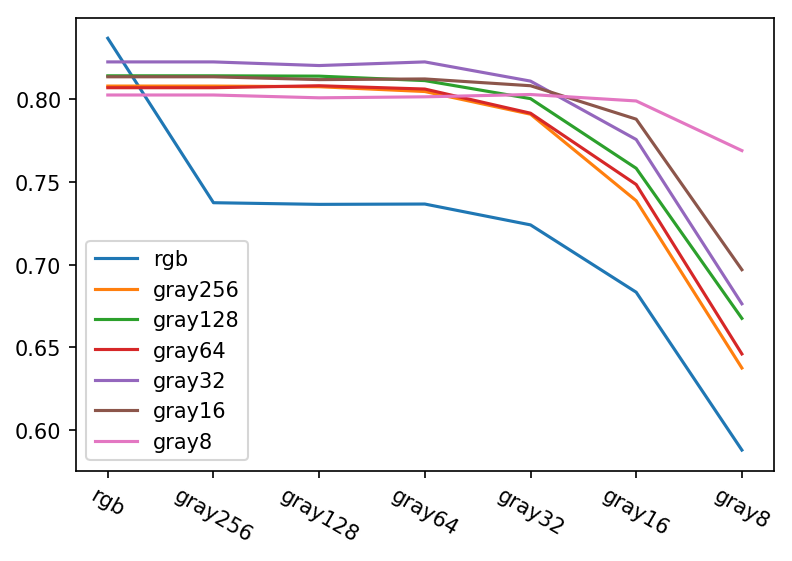

In [8]:
all_conv_orig = cifar10_orig_results[cifar10_orig_results['model'].str.contains('all_conv')]
plot_acc_line(all_conv_orig)

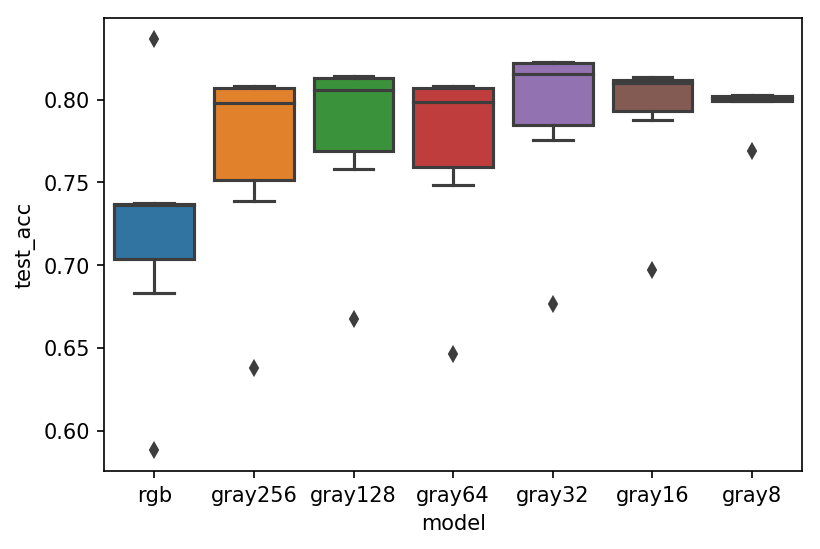

In [9]:
sb.boxplot(x='model', y='test_acc', data=all_conv_orig[['model', 'test_acc']], order=CS_ORDER)

### ResNet 20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


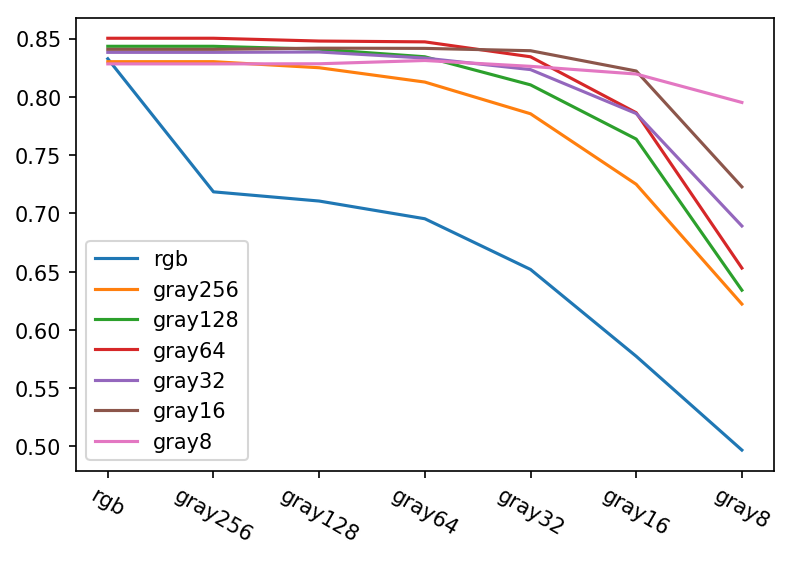

In [10]:
resnet20_orig = cifar10_orig_results[cifar10_orig_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_orig)

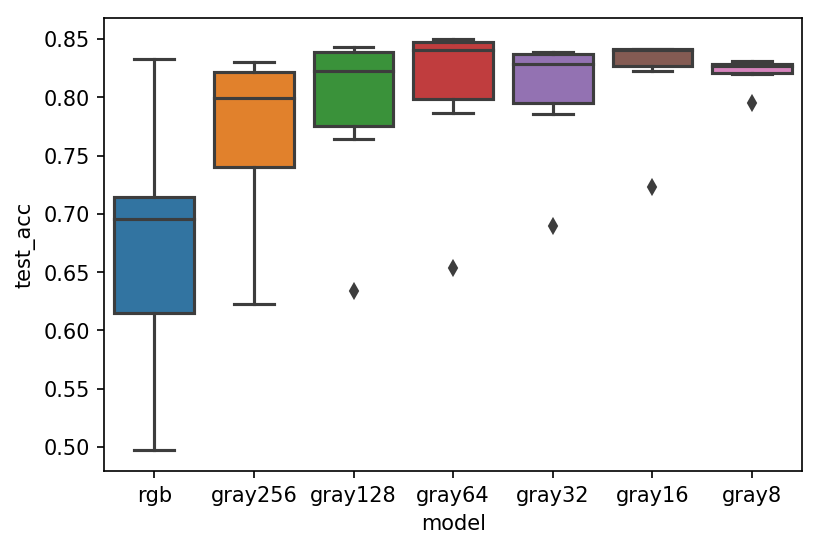

In [11]:
sb.boxplot(x='model', y='test_acc', data=resnet20_orig[['model', 'test_acc']], order=CS_ORDER)

## results for "feture" NNs

In [12]:
cifar10_features_results = cifar10_results[cifar10_results['clf'] == 'lr']

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


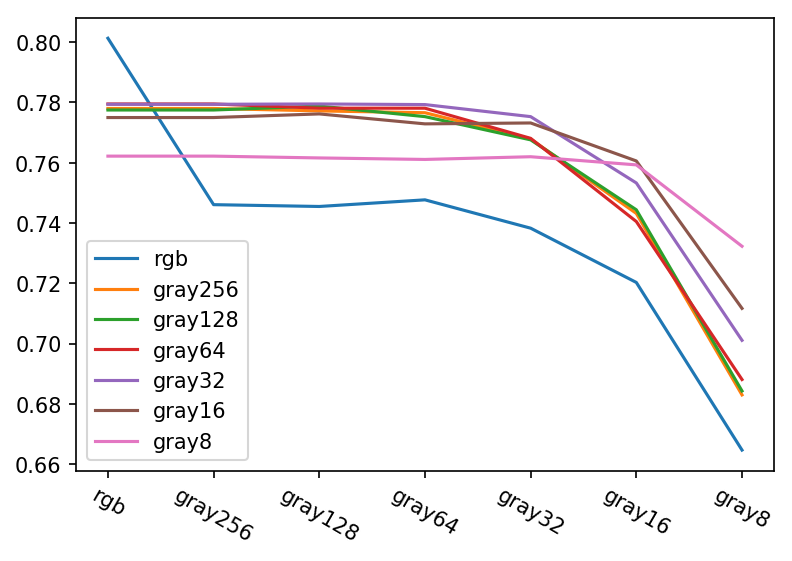

In [13]:
simple_features = cifar10_features_results[cifar10_features_results['model'].str.contains('simple')]
plot_acc_line(simple_features)

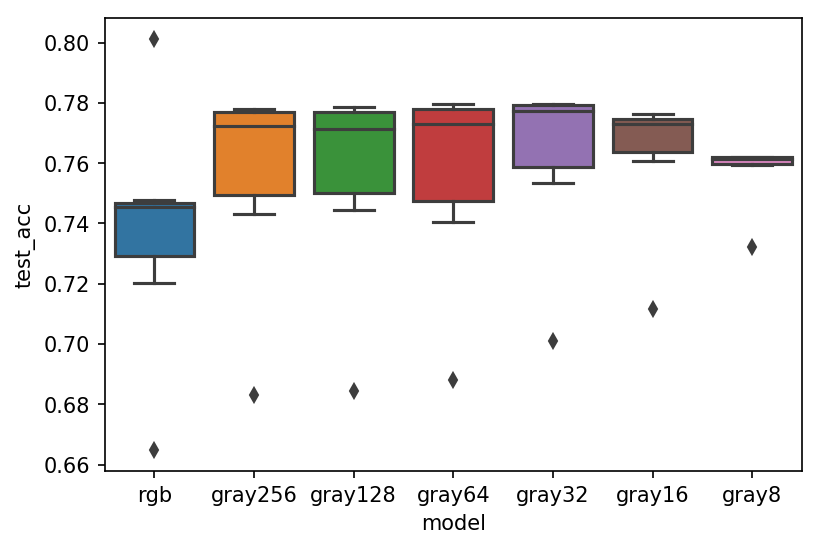

In [14]:
sb.boxplot(x='model', y='test_acc', data=simple_features[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


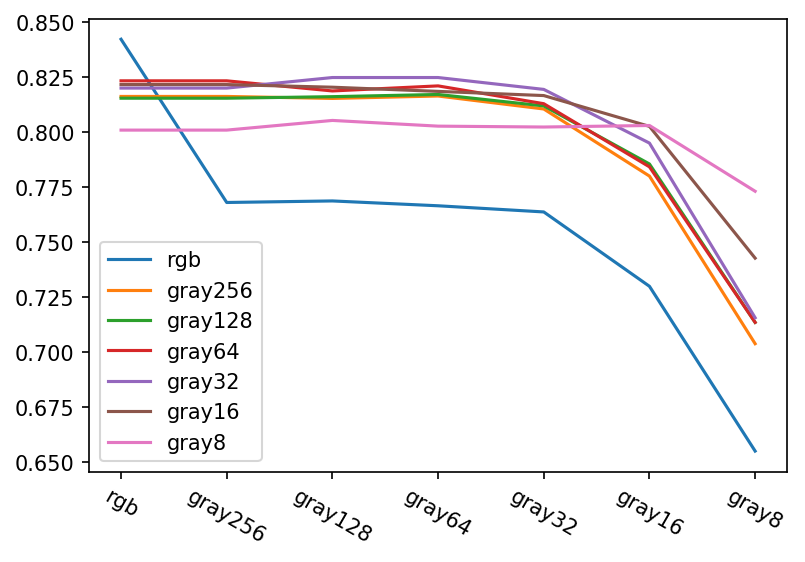

In [15]:
all_conv_features = cifar10_features_results[cifar10_features_results['model'].str.contains('all_conv')]
plot_acc_line(all_conv_features)

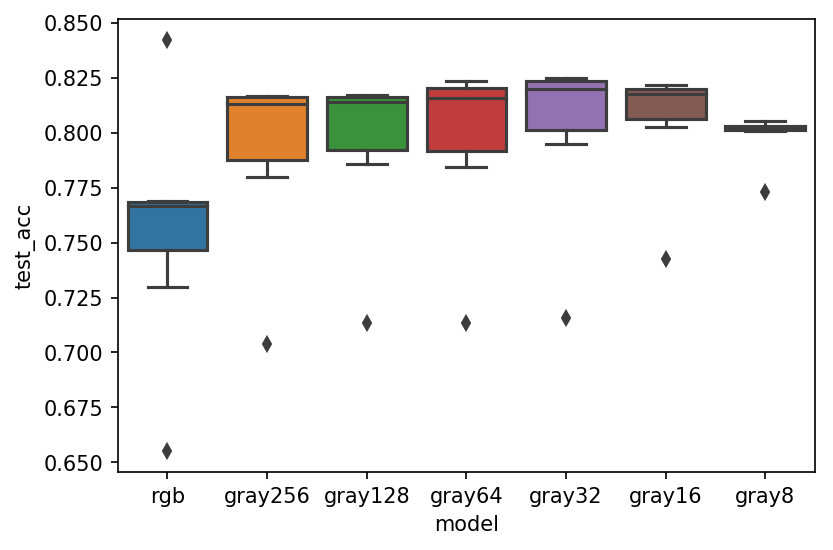

In [16]:
sb.boxplot(x='model', y='test_acc', data=all_conv_features[['model', 'test_acc']], order=CS_ORDER)

### resnet20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


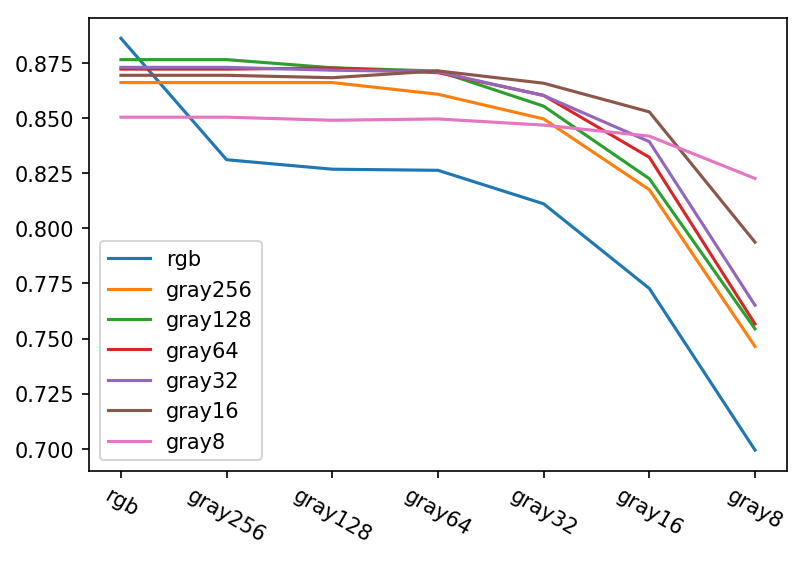

In [17]:
resnet20_features = cifar10_features_results[cifar10_features_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_features)

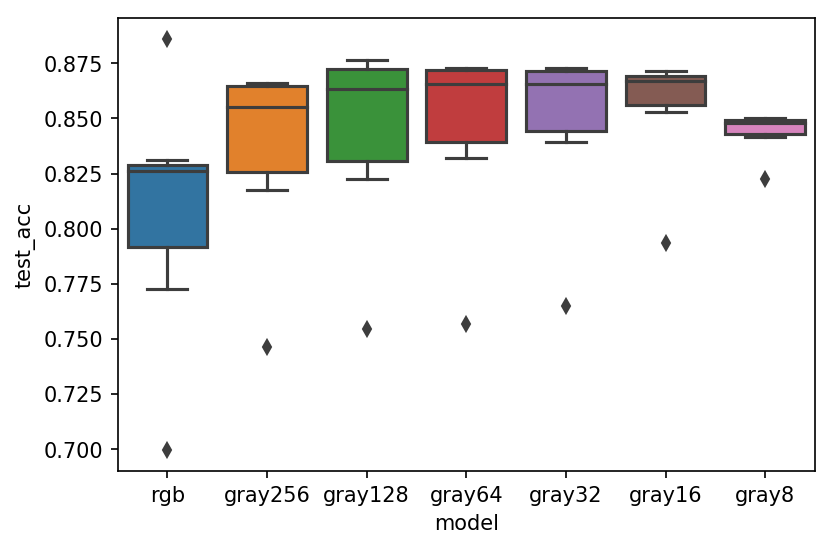

In [18]:
sb.boxplot(x='model', y='test_acc', data=resnet20_features[['model', 'test_acc']], order=CS_ORDER)

# CIFAR-100_fine results

In [19]:
cifar100_fine_results = pd.read_csv('results_cifar100_fine.csv')

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


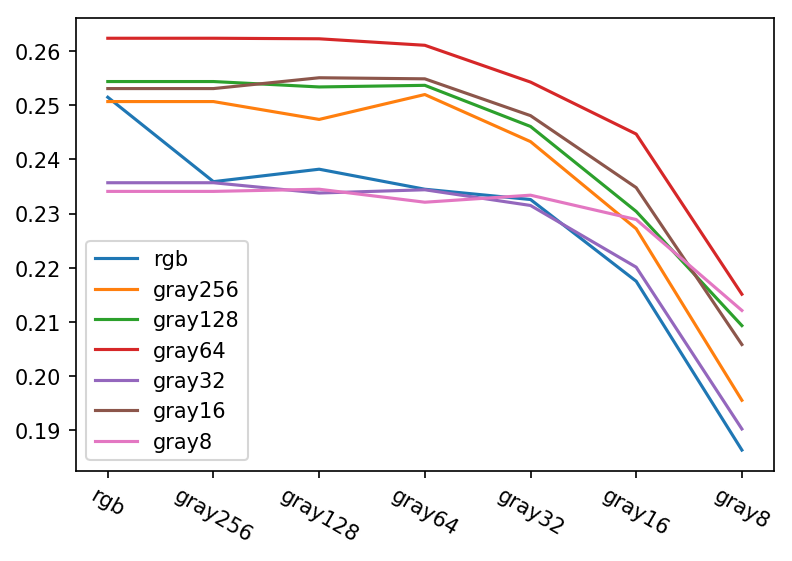

In [20]:
simple_cf_features = cifar100_fine_results[cifar100_fine_results['model'].str.contains('simple')]
plot_acc_line(simple_cf_features)

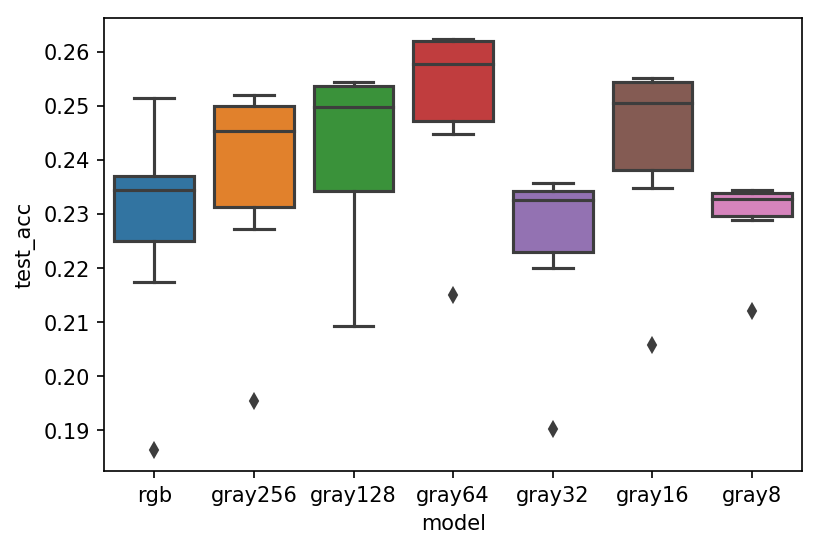

In [21]:
sb.boxplot(x='model', y='test_acc', data=simple_cf_features[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


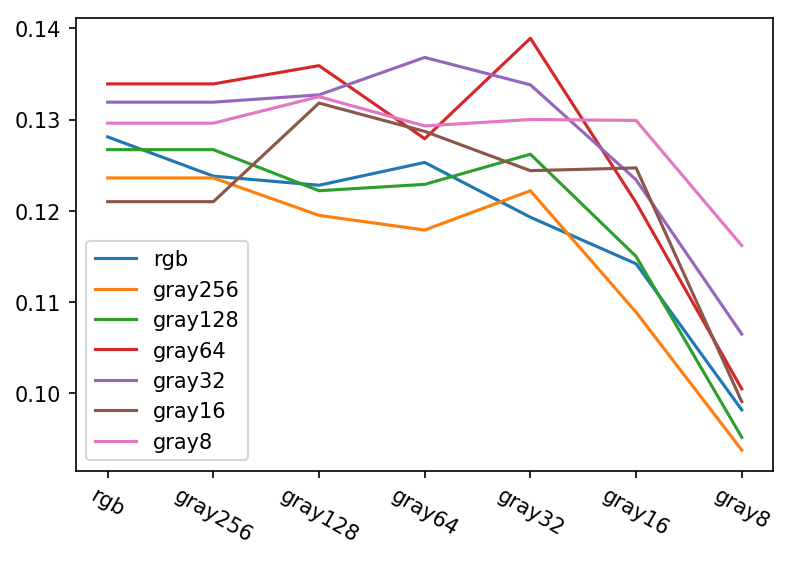

In [22]:
all_conv_cf_features = cifar100_fine_results[cifar100_fine_results['model'].str.contains('all_conv')]
plot_acc_line(all_conv_cf_features)

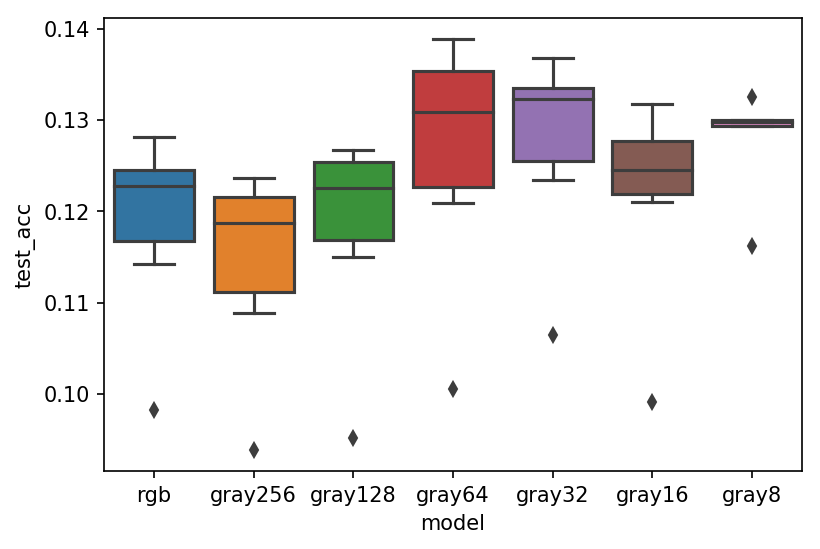

In [23]:
sb.boxplot(x='model', y='test_acc', data=all_conv_cf_features[['model', 'test_acc']], order=CS_ORDER)

### resnet20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


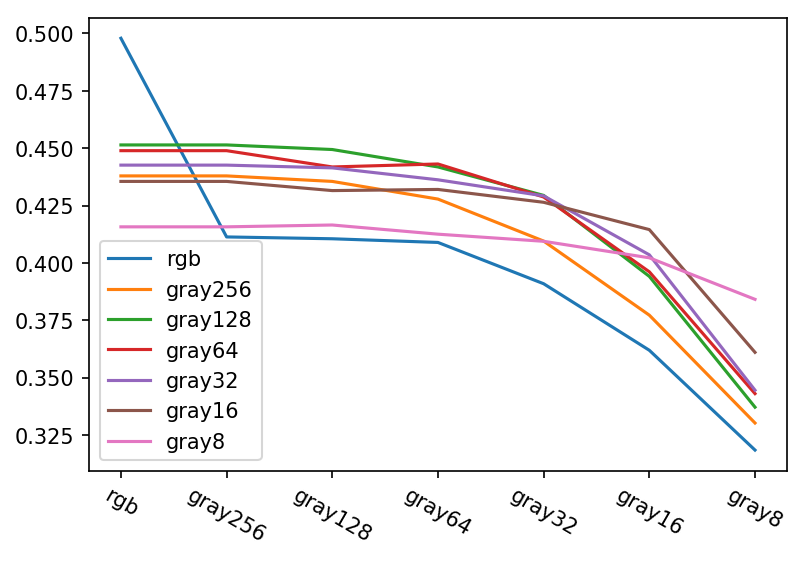

In [24]:
resnet20_cf_features = cifar100_fine_results[cifar100_fine_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_cf_features)

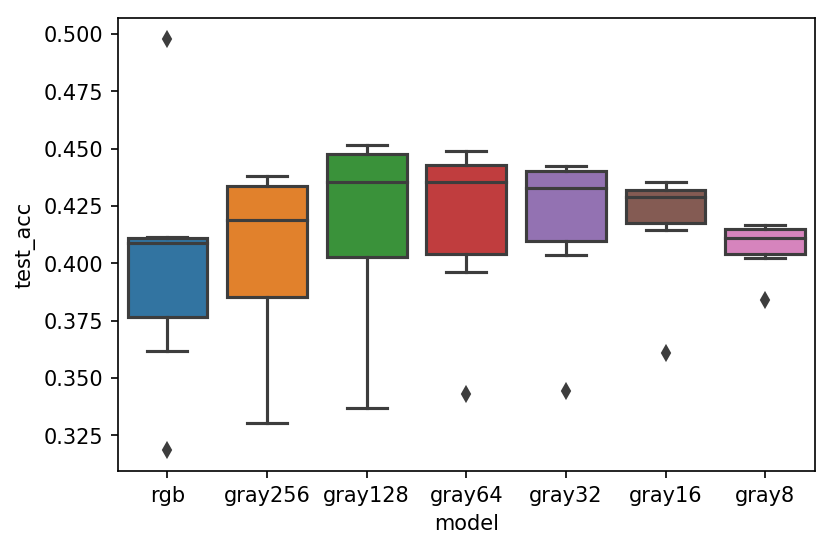

In [25]:
sb.boxplot(x='model', y='test_acc', data=resnet20_cf_features[['model', 'test_acc']], order=CS_ORDER)

# CIFAR-100_coarse results

In [26]:
cifar100_coarse_results = pd.read_csv('results_cifar100_coarse.csv')

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


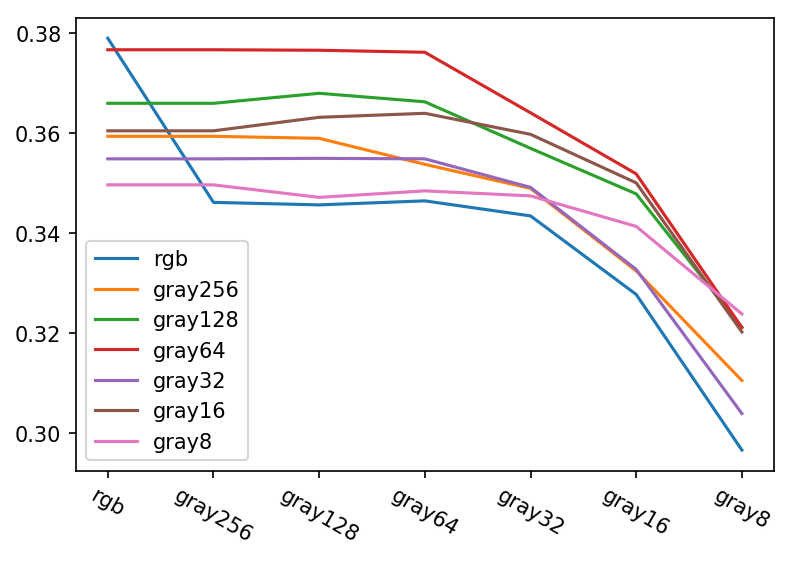

In [27]:
simple_cc_features = cifar100_coarse_results[cifar100_coarse_results['model'].str.contains('simple')]
plot_acc_line(simple_cc_features)

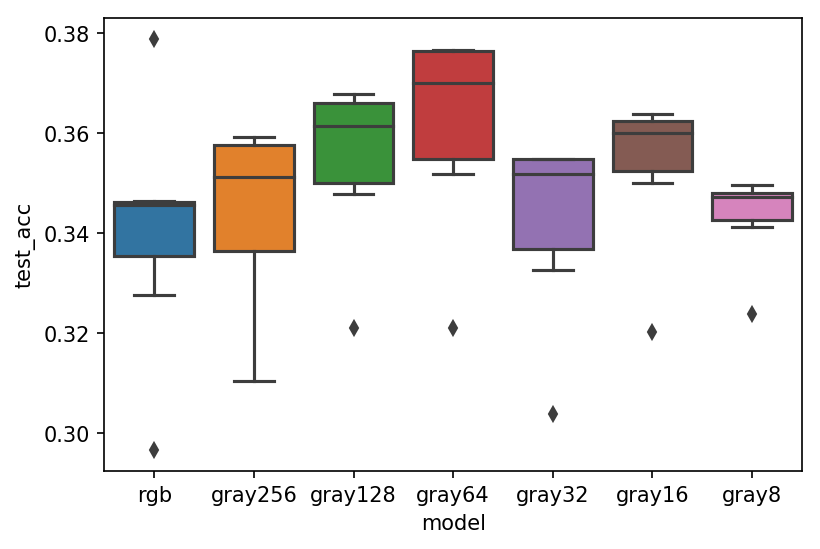

In [28]:
sb.boxplot(x='model', y='test_acc', data=simple_cc_features[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


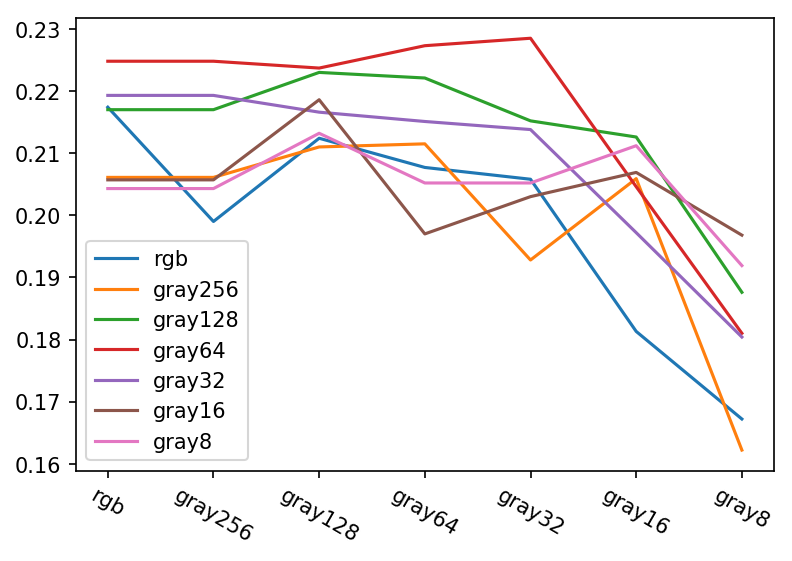

In [29]:
all_conv_cc_features = cifar100_coarse_results[cifar100_coarse_results['model'].str.contains('all_conv')]
plot_acc_line(all_conv_cc_features)

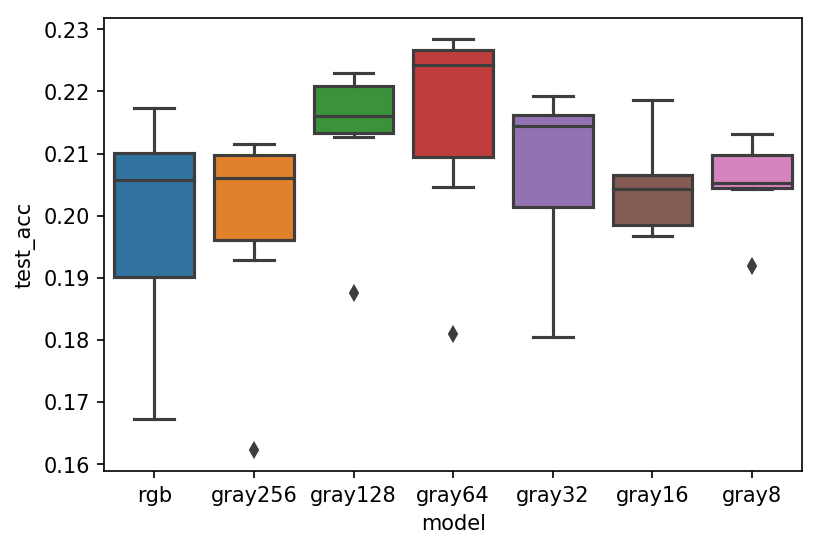

In [30]:
sb.boxplot(x='model', y='test_acc', data=all_conv_cc_features[['model', 'test_acc']], order=CS_ORDER)

### resnet20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


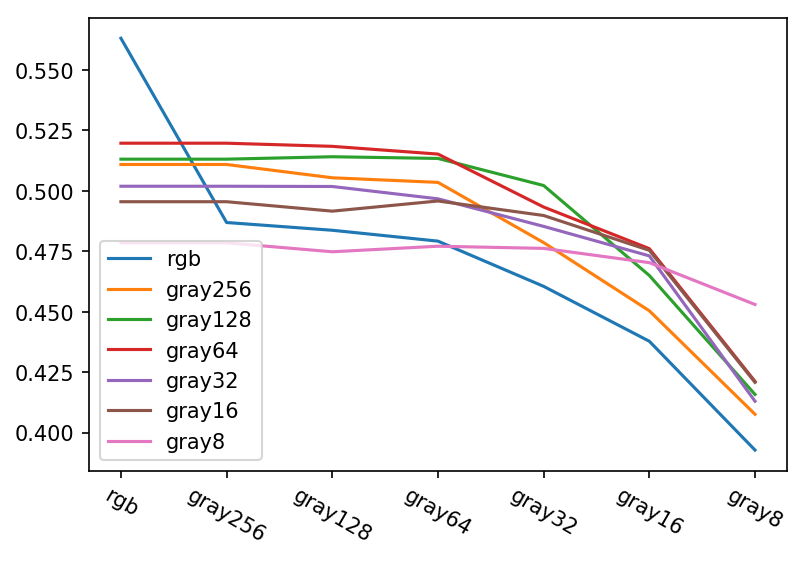

In [31]:
resnet20_cc_features = cifar100_coarse_results[cifar100_coarse_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_cc_features)

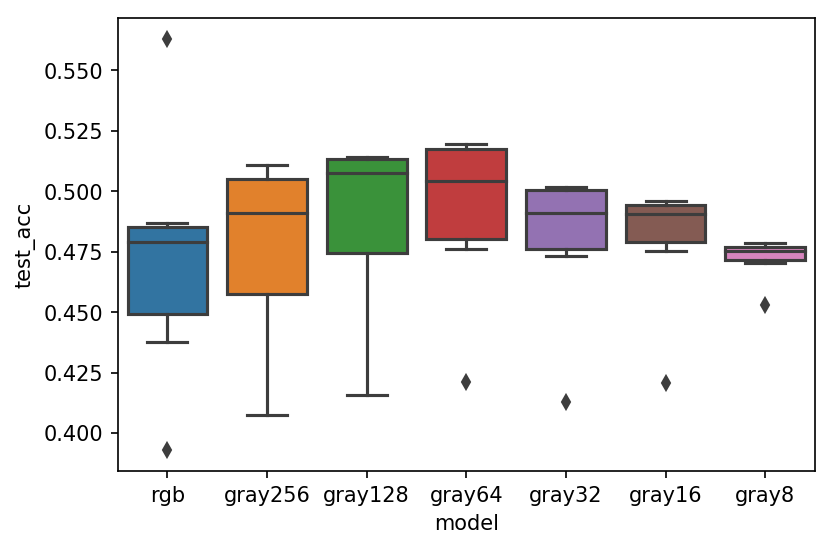

In [32]:
sb.boxplot(x='model', y='test_acc', data=resnet20_cc_features[['model', 'test_acc']], order=CS_ORDER)

# Fashion-MNIST results

In [33]:
fashion_mnist_results = pd.read_csv('results_fashion_mnist.csv')

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


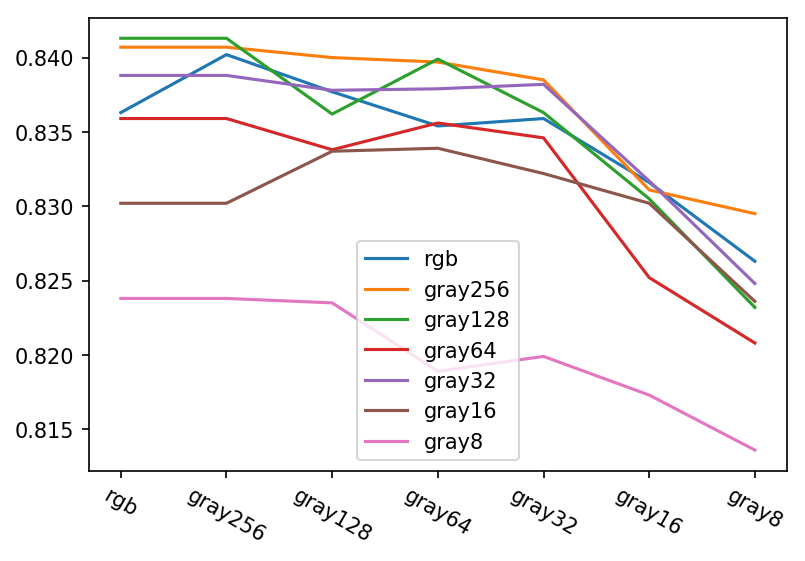

In [34]:
simple_fm_features = fashion_mnist_results[fashion_mnist_results['model'].str.contains('simple')]
plot_acc_line(simple_fm_features)

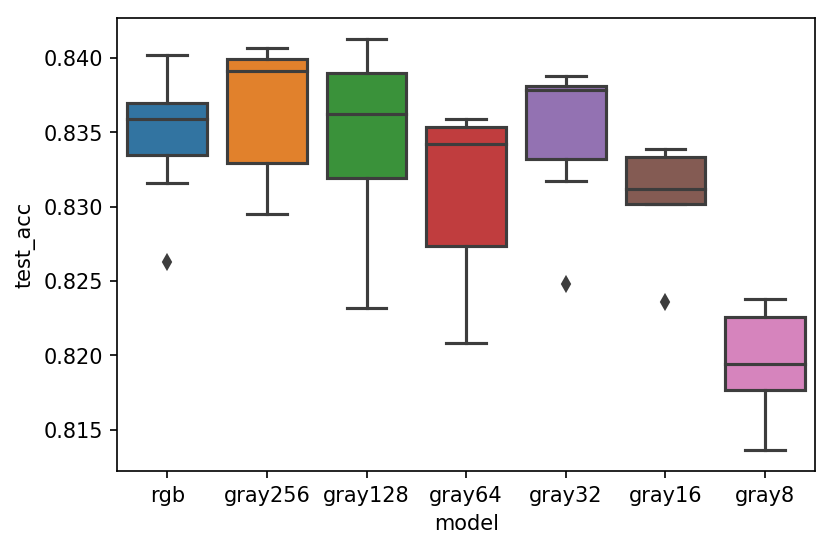

In [35]:
sb.boxplot(x='model', y='test_acc', data=simple_fm_features[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


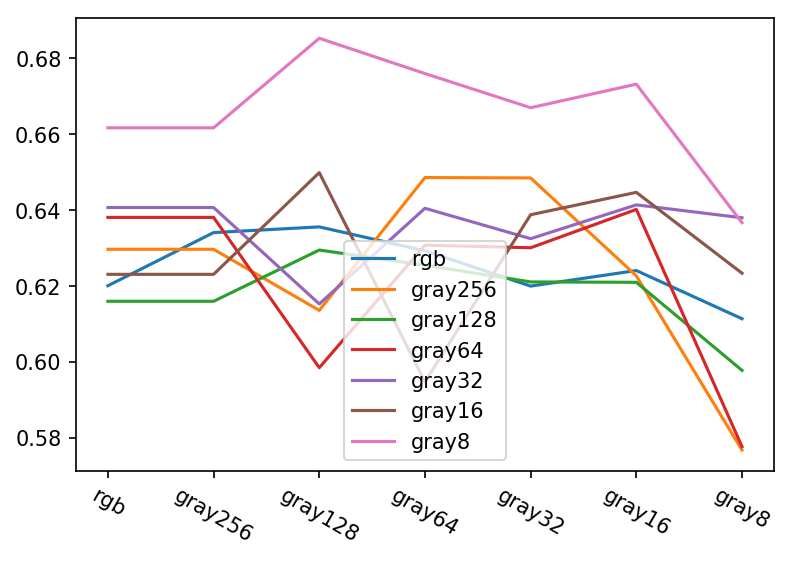

In [36]:
all_conv_fm_features = fashion_mnist_results[fashion_mnist_results['model'].str.contains('all_conv')]
plot_acc_line(all_conv_fm_features)

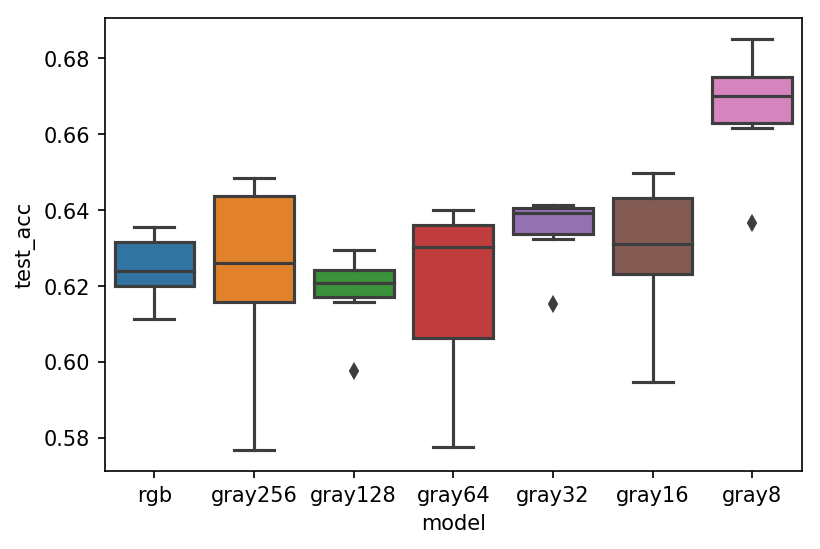

In [37]:
sb.boxplot(x='model', y='test_acc', data=all_conv_fm_features[['model', 'test_acc']], order=CS_ORDER)

### resnet20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


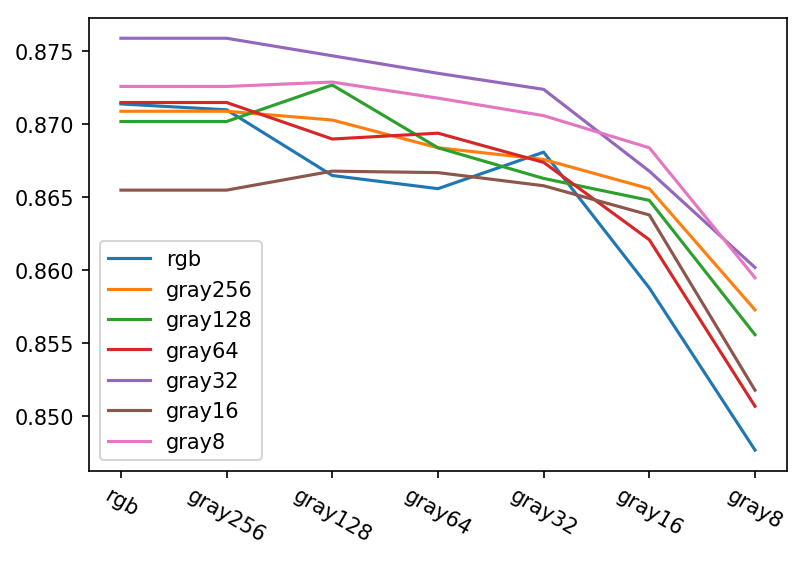

In [38]:
resnet20_fm_features = fashion_mnist_results[fashion_mnist_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_fm_features)

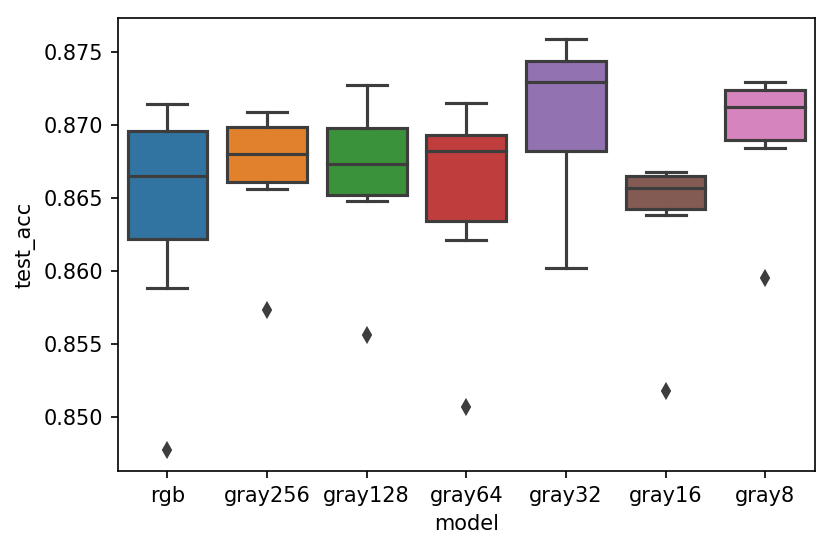

In [39]:
sb.boxplot(x='model', y='test_acc', data=resnet20_fm_features[['model', 'test_acc']], order=CS_ORDER)